In [68]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import tensorflow as tf
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import animation

# Customize the default style
import matplotlib as mpl
mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.facecolor"] = "#ffffee"
mpl.rcParams["grid.linestyle"] = "--"
mpl.rcParams["figure.figsize"] = (15, 15)

from IPython.display import HTML
from auxiliar import *

# Vectors

We can think in vectors as arrows in the Cartesian coordinate system. 

And even, if we do not know the analytical way of adding vectors, we can do it visually.

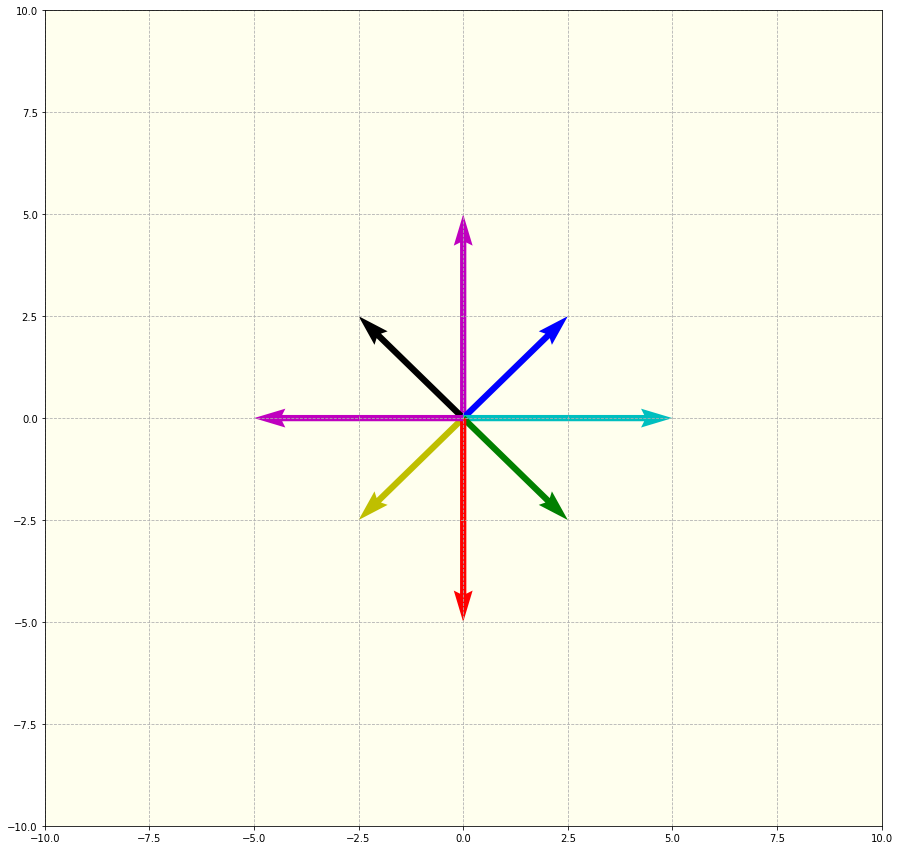

In [2]:
# Visualization of vectors
vectors = np.array([
    [0, 0, 0, 5],
    [0, 0, -2.5, 2.5],
    [0, 0, 2.5, 2.5],
    [0, 0, 5, 0],
    [0, 0, 2.5, -2.5],
    [0, 0, -2.5, -2.5],
    [0, 0, 0, -5],
    [0, 0, -5, -0],
    ])

# draw_vectors2(vectors)
draw_vectors(vectors)

## Length of a vector and distance beetween vectors

In [3]:
a = np.array((0,0))
b = np.array((0,3))
c = np.array((4,3))

## Dot product (inner product)

In [4]:
a = np.random.randint(10, size=10)
b = np.random.randint(10, size=10)

# Linear Regression

Linear regression is the Swiss Army knife on the Machine Learning and Data Science world.

0.5000909090909089 3.000090909090909


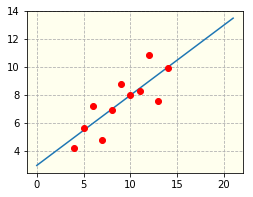

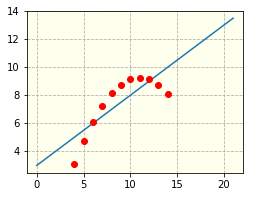

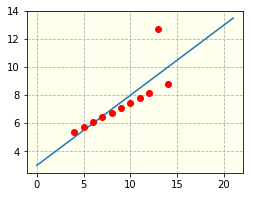

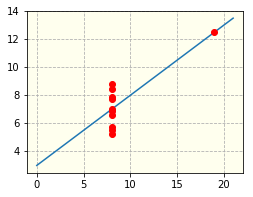

In [91]:
def lsq_solution(X, y):
    w = np.dot(np.dot(la.inv(np.dot(X.T, X)), X.T), y)
    return w


def data_matrix(x):
    n = len(x)
    b = np.ones((n, 1))
    return np.hstack((x, b))


def solve_anscombe(dataset):
    """
    """
    y = dataset[:,1:2]
    x = dataset[:,0:1]
    X = data_matrix(x)
    w = lsq_solution(X, y)
    slope, offset = w[0,0], w[1,0]
    return slope, offset


def plot_anscombe(dataset, slope, offset):
    """
    Plot Anscombe
    """
    y = dataset[:,1:2]
    x = dataset[:,0:1]
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
    abline_values = [slope * i + offset for i in range(0, 22)]
    ax.plot(range(0, 22), abline_values)
    ax.plot( x, y, 'ro', lw=2)
    plt.show()

    
X = np.genfromtxt("data/anscombes.csv", dtype=float, delimiter=',')
X = X[1:,2:]
AX, BX, CX, DX = X[0:11,:], X[11:22,:], X[22:33,:], X[33:44,:] 

s, o = solve_anscombe(AX)
plot_anscombe(AX, s, o)

s, o = solve_anscombe(BX)
plot_anscombe(BX, s, o)

s, o = solve_anscombe(CX)
plot_anscombe(CX, s, o)

s, o = solve_anscombe(DX)
plot_anscombe(DX, s, o)


# Linear Regression (with Tensorflow)

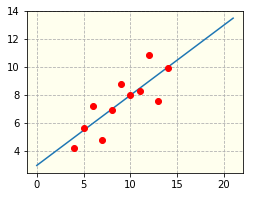

In [92]:
def plot_anscombe(dataset, slope, offset):
    """
    Plot Anscombe
    """
    x = dataset[:,0:1]
    y = dataset[:,1:2]
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
    abline_values = [slope * i + offset for i in range(0, 22)]
    ax.plot(range(0, 22), abline_values)
    ax.plot( x, y, 'ro', lw=2)
    plt.show()


X = np.genfromtxt("data/anscombes.csv", dtype=float, delimiter=',')
X = X[1:,2:]
AX, BX, CX, DX = X[0:11,:], X[11:22,:], X[22:33,:], X[33:44,:] 

x = AX[:,0:1]
XX = data_matrix(x)
yy = AX[:,1:2]

# multiply two matrices
X = tf.placeholder(
        tf.float32,
        shape = AX.shape,
        name = None
        )

y = tf.placeholder(
        tf.float32,
        shape = yy.shape,
        name = None
        )

# Here, the lsq solution
result = tf.matmul(
            tf.matmul(
                tf.matrix_inverse(
                    tf.matmul(
                        tf.transpose(XX),
                        XX
                    )
                ),
                tf.transpose(XX),
            ), 
            yy
        )


with tf.Session() as session:
    feed_dict = {X: XX, y: yy}
    ww = session.run(result, feed_dict = feed_dict)

plot_anscombe(AX, ww[0, 0], ww[1, 0])

# A simple perceptron

Now, we will build a simple perceptron, and we will use this simple perceptron to solve the XOR problem. 

Yes! To solve the XOR problem!

We usually are taught that a simple perceptron is not capable of solving the XOR problem, however, we will do it.

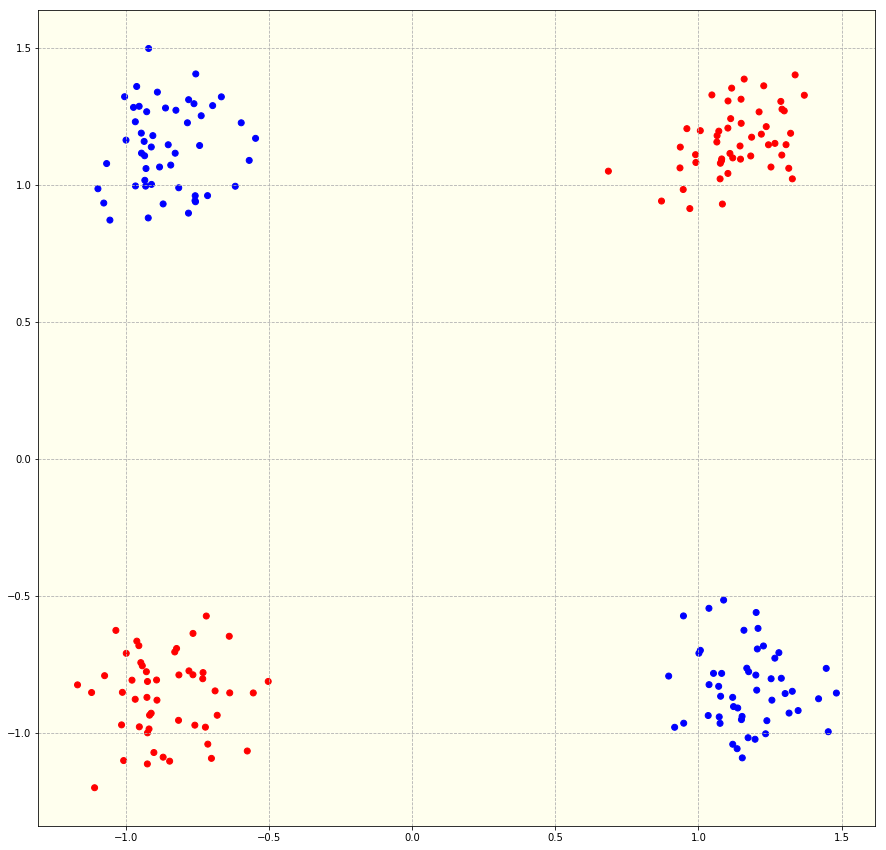

In [13]:
# Generate a XOR dataset "artificially"
def random_points(x, y, size, category):
    """
    Generates x random points around another point
    """
    dataset = np.array((x, y)) - np.random.normal(-0.15, 0.15, (size, 2))
    dataset = np.append(dataset, np.full((size, 1), category), axis=1)
    return dataset


xor_dataset = random_points(1.0, 1.0, 50, 1)
xor_dataset = np.append(xor_dataset, random_points(-1.0, -1.0, 50, 1), axis=0)
xor_dataset = np.append(xor_dataset, random_points(1.0, -1.0, 50, 0), axis=0)
xor_dataset = np.append(xor_dataset, random_points(-1.0, 1.0, 50, 0), axis=0)

plt.figure()
colors = np.where(xor_dataset[:,2], "red", "blue")
plt.scatter(xor_dataset[:,0], xor_dataset[:,1], c=colors)
plt.show()

In [12]:
def non_monotonic_function(x, w, theta):
    """
    """
    wx = np.dot(w.T, x) - theta
    return np.cos(wx)


def perceptron(X, Y):
    """
    Implementation of a simple perceptron.
    X is the feature matrix,
    Y is the label vector
    """
    n_examples = X.shape[0]

    # initialize weights, and theta, and learning rate
    theta = np.random.uniform(low=-0.99, high=0.99)
    w = np.random.uniform(low=-0.99, high=0.99, size=(2))

    eta_w = 0.005
    eta_theta = 0.001

    unit_step = lambda x: 0 if x < 0 else 1

    for epoch in range(30):

        upd_theta = 0
        upd_weight = 0

        # random batch
        for x, y in unison_shuffled(X, Y):

            yhat = non_monotonic_function(x, w, theta)
            dis = yhat - y

            wx = np.dot(w.T, x) - theta
            exp = np.exp(-0.5 * np.square(wx))
            upd_weight += dis * 2 * exp * wx  * x * -1
            upd_theta += dis * 2 * exp * wx

        w = w - eta_w * upd_weight
        theta = theta - eta_theta * upd_theta

        if epoch % 3 == 0:

            Yhat = [non_monotonic_function(X[i], w, theta) for i in range(len(Y))]
            Yhat = np.where(np.array(Yhat) > 0, 1, -1)
            correct_predictions = np.sum(Yhat == Y)

            if correct_predictions == 200:
                visualization(X, Y, w, theta, Yhat, epoch=epoch, predictions=correct_predictions)
                break
                
            visualization(X, Y, w, theta, Yhat, epoch=epoch, predictions=correct_predictions)


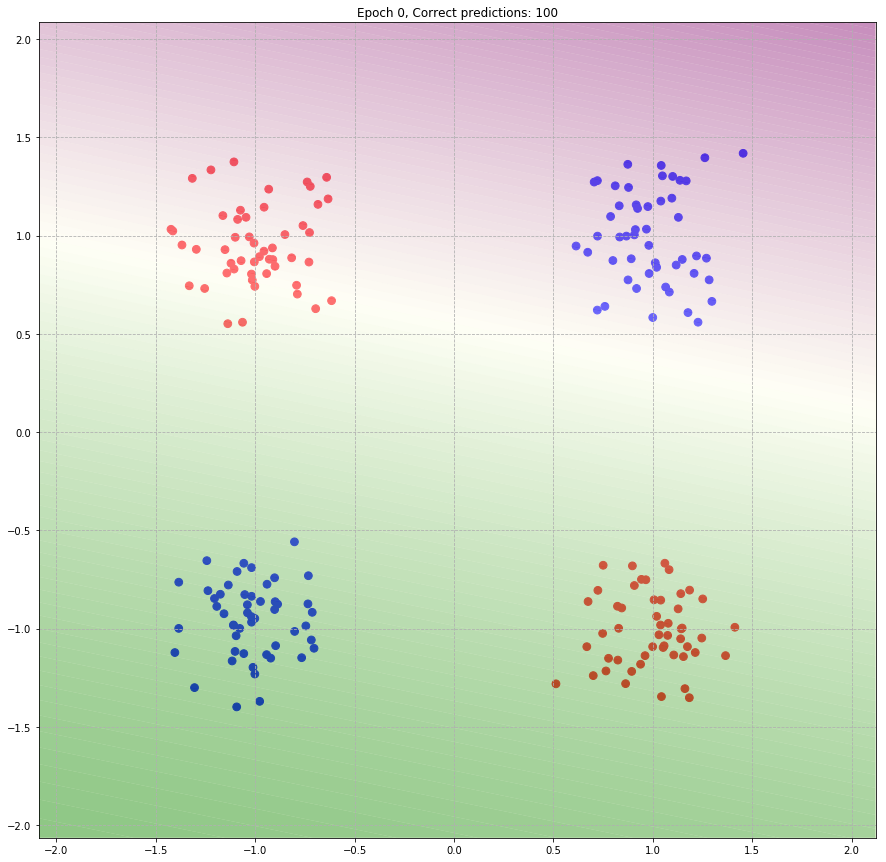

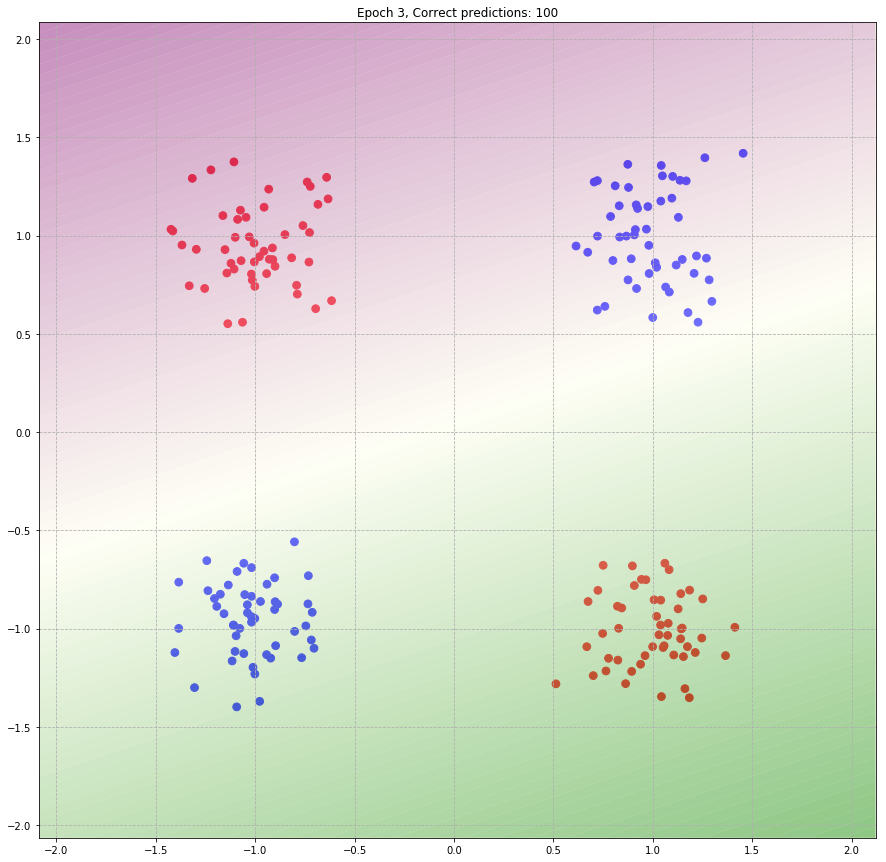

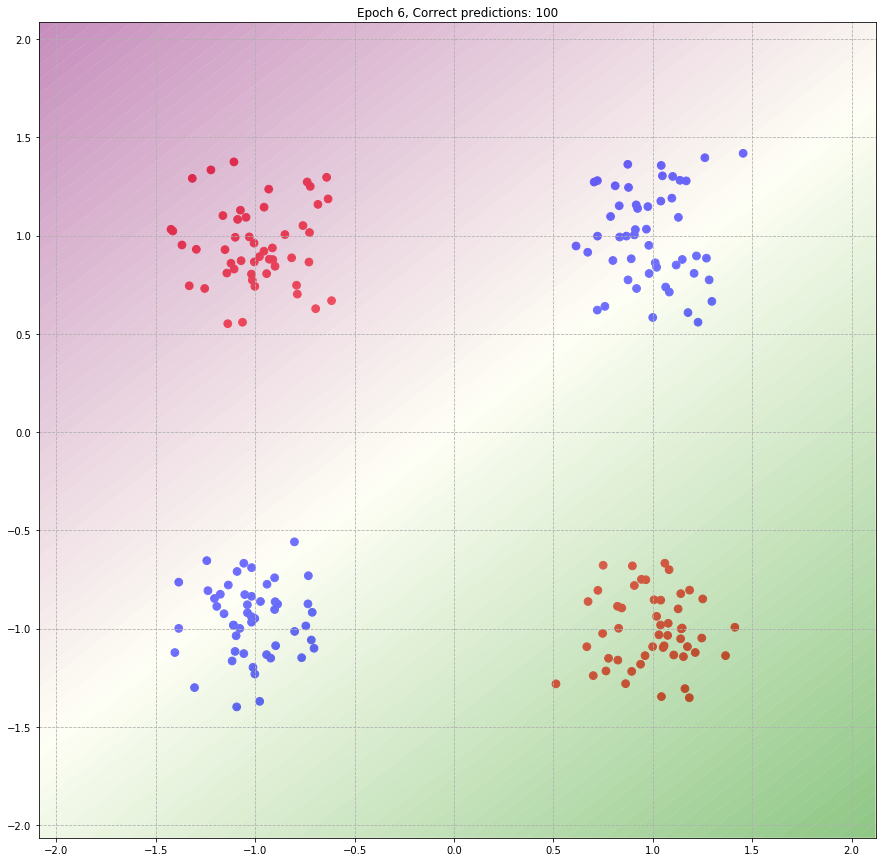

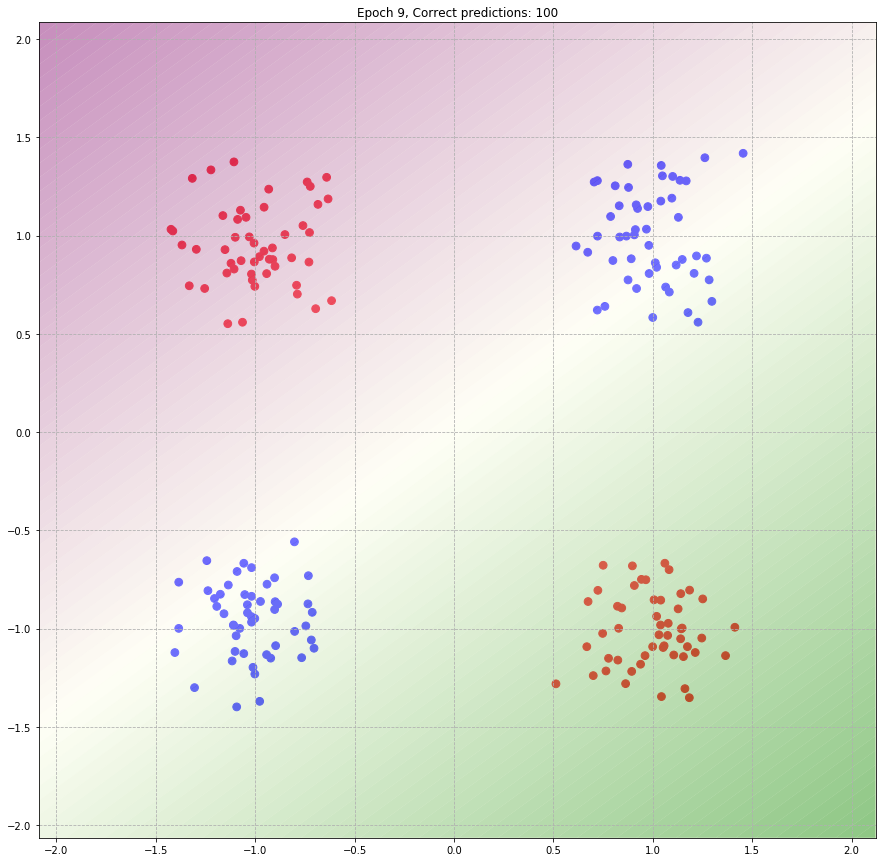

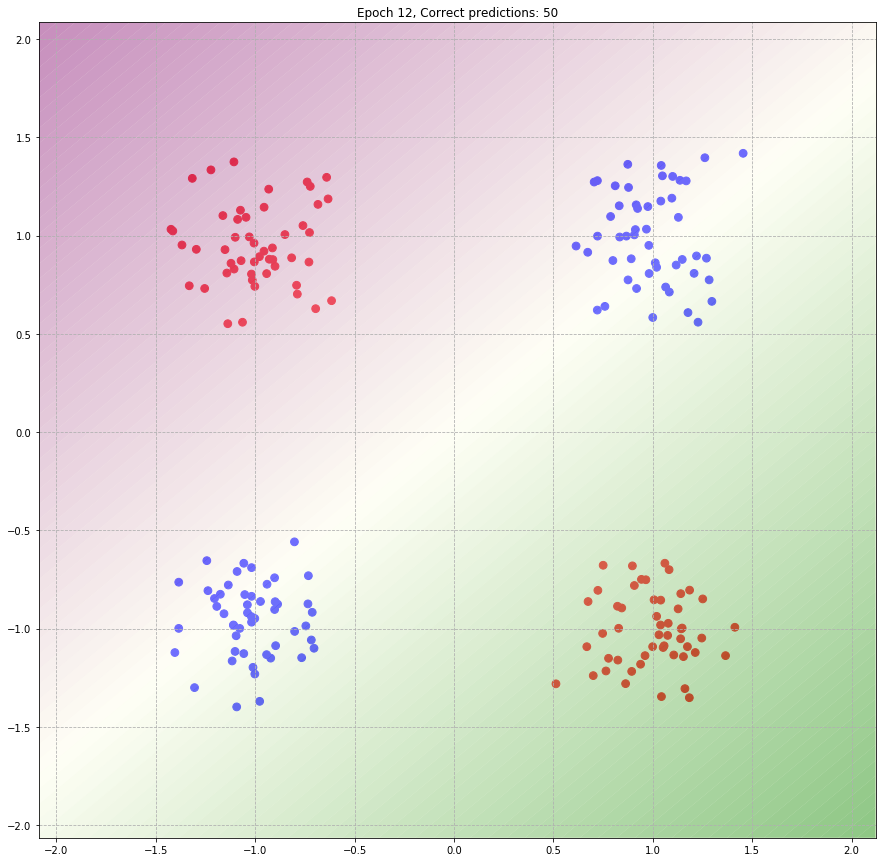

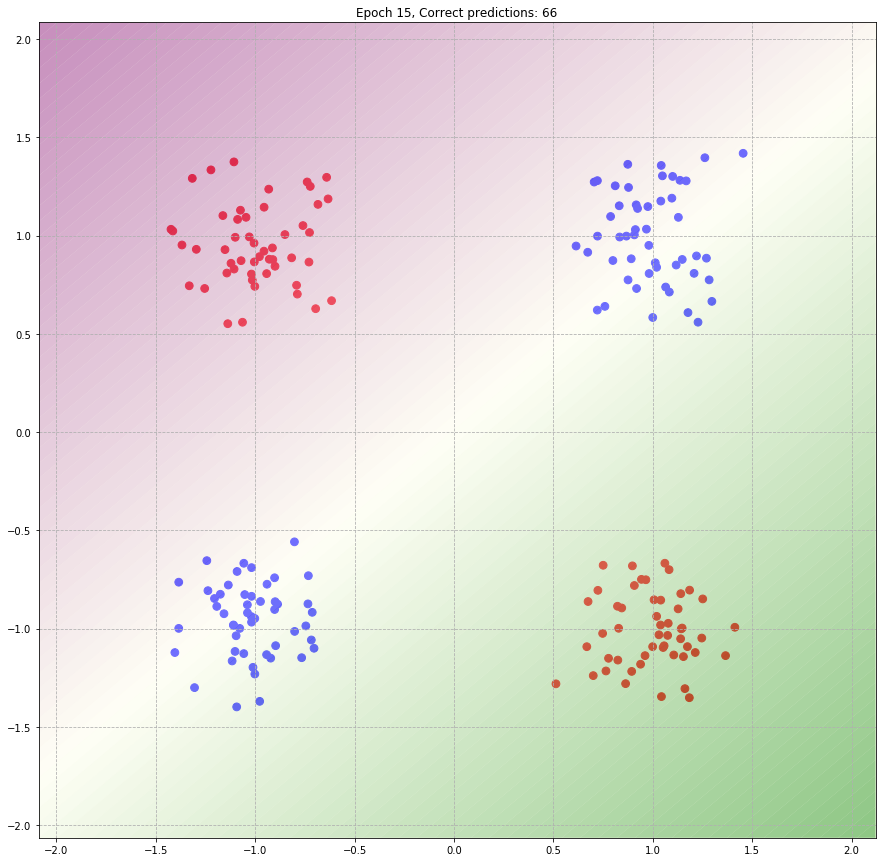

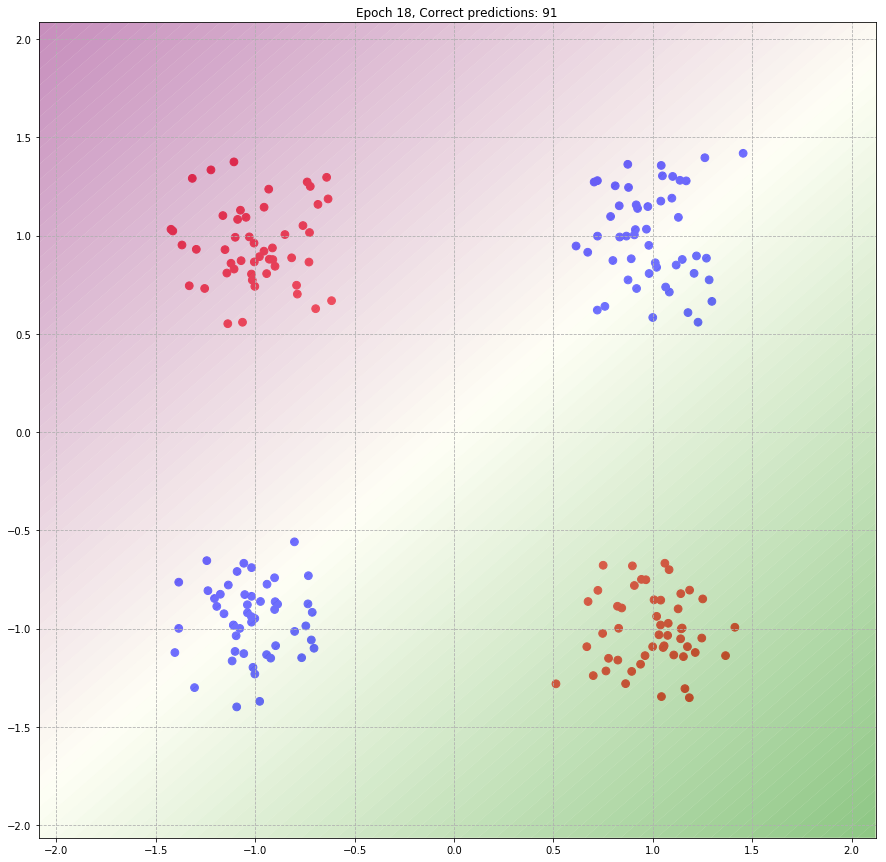

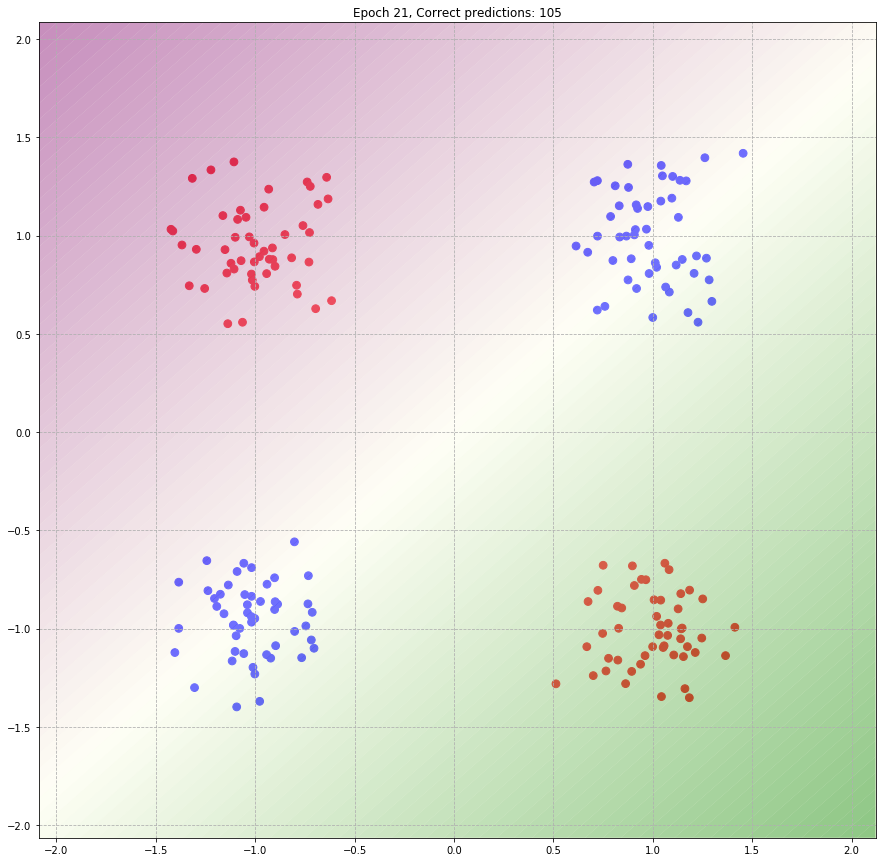

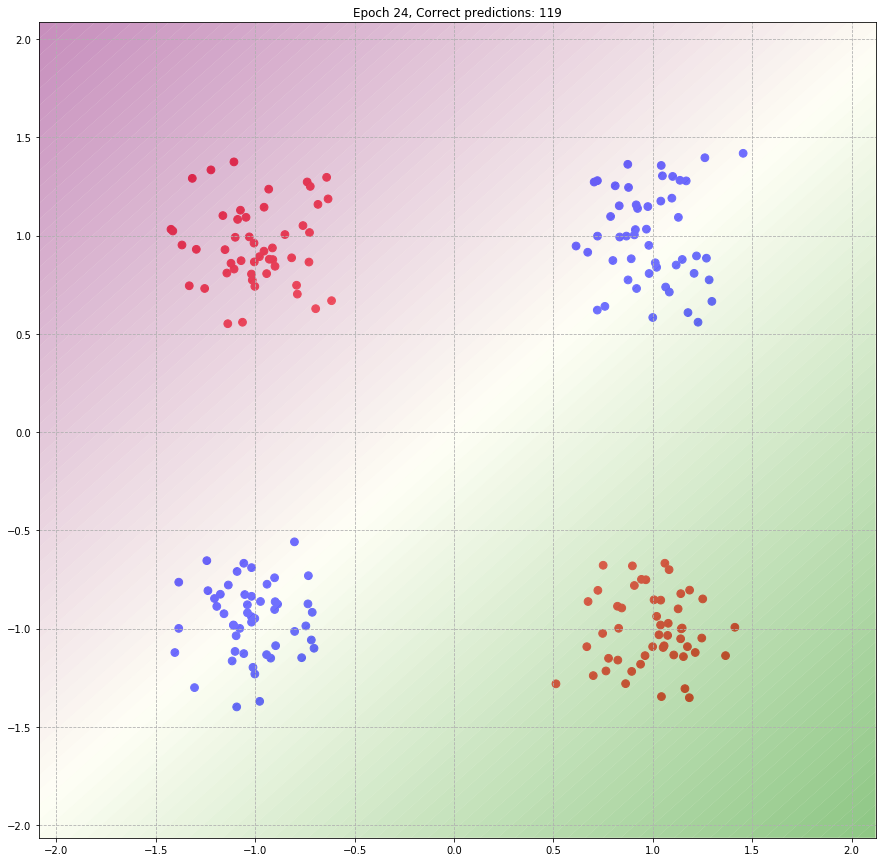

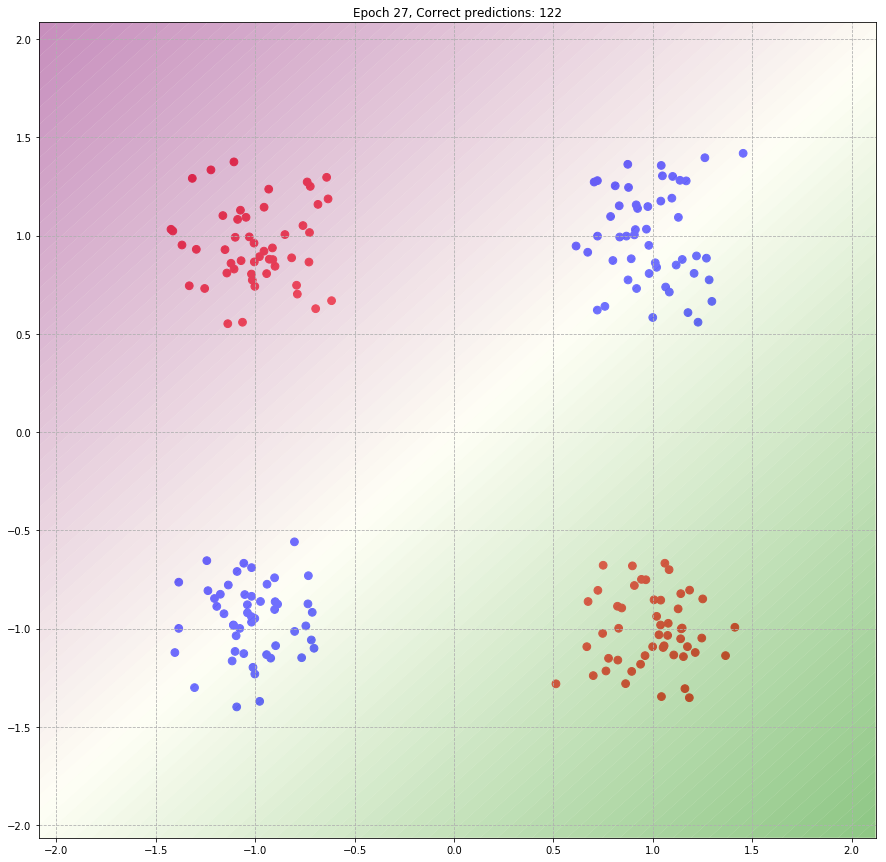

In [41]:
#X = xor_dataset[:,0:-1]
#Y = xor_dataset[:,2]
X = np.genfromtxt("data/xor-X.csv", dtype=float, delimiter=',').T
Y = np.genfromtxt("data/xor-y.csv", dtype=float, delimiter=',')
perceptron(X, Y)